In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
Y = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)

C:\Users\nicho\AppData\Local\Temp\ipykernel_9800\2019897654.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


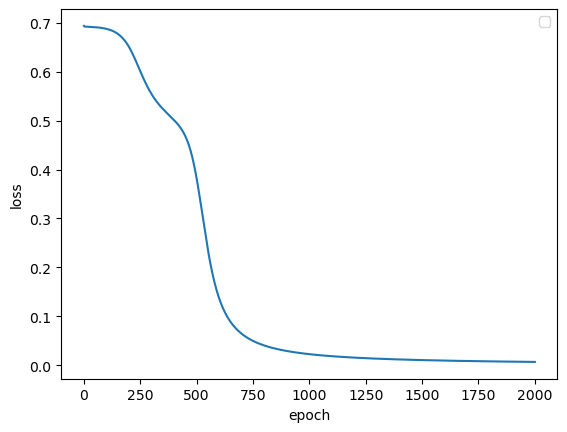

In [ ]:
model = nn.Sequential(nn.Linear(2, 2, bias=True), nn.Sigmoid(),
                      nn.Linear(2, 1, bias=True), nn.Sigmoid())

criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1) 
losses = []

for step in range(2001): 
    optimizer.zero_grad()
    hypothesis = model(X)
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()        
    losses.append(cost.item())

plt.plot(losses)
plt.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

In [ ]:
Y_hat = model(X)
print('Predicted: ', Y_hat)
print('Actual: ', Y)

Predicted:  tensor([[0.0057],
        [0.9926],
        [0.9926],
        [0.0066]], grad_fn=<SigmoidBackward0>)
Actual:  tensor([[0.],
        [1.],
        [1.],
        [0.]])


*** Write down your answer here ***

Formula of bias for layer 2

$$\frac{\partial L}{\partial b^2} =(\hat{y} - y)$$

Formula of weights of layer 2
$$\frac{\partial L}{\partial \vec{w}^{\,(2)}} = \begin{bmatrix}
\frac{\partial L}{\partial w^2_{11}}\\
\frac{\partial L}{\partial w^2_{21}}
\end{bmatrix} = (\hat{y} - y) \cdot h^{(1)}$$

Formula of biases of layer 1
$$\frac{\partial L}{\partial \vec{b}^{\,(1)}} =\begin{bmatrix}
\frac{\partial L}{\partial b^1_1}\\
\frac{\partial L}{\partial b^1_2}
\end{bmatrix} = [ (\hat{y} - y) \cdot w^{(2)} \cdot h^{(1)} \cdot (1 - h^{(1)}) ]$$

Formula of weights of layer 1
$$
\frac{\partial L}{\partial \vec{W}^{\,(1)}} =\begin{bmatrix}
\frac{\partial L}{\partial w^1_{11}} & \frac{\partial L}{\partial w^1_{12}} \\
\frac{\partial L}{\partial w^1_{21}} & \frac{\partial L}{\partial w^1_{22}}  
\end{bmatrix} = [ (\hat{y} - y) \cdot w^{(2)} \cdot h^{(1)} \cdot (1 - h^{(1)}) \cdot x ]$$


In [ ]:
# multi-layer neural network without using external deep learning libraries

In [4]:
import numpy as n
import matplotlib.pyplot as plt

In [6]:
X = n.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = n.array([[0], [1], [1], [0]])

In [7]:
# Sigmoid
def sigmoid(x):
    return 1 / (1 + n.exp(-x))

In [8]:
# Derivative of sigmoid
def sigmoid_derivative(x):
    return x * (1 - x)

In [9]:
# Binary cross-entropy loss
def binary_cross_entropy(y_true, y_pred):
    return -(y_true * n.log(y_pred + 1e-9) + (1 - y_true) * n.log(1 - y_pred + 1e-9))

In [10]:
# Initialization of weights and biases
def initialize_parameters():
    weights_hidden = n.array([[0.5, -0.5], [-0.5, 0.5]])
    bias_hidden = n.array([0.0, 0.0])
    weights_output = n.array([[0.5], [-0.5]])
    bias_output = n.array([0.0])
    return weights_hidden, bias_hidden, weights_output, bias_output

In [11]:
# Weights and biases
weights_hidden, bias_hidden, weights_output, bias_output = initialize_parameters()

learning_rate = 0.8
epochs = 2000
losses = []

In [12]:
# Gradient Descent
for epoch in range(epochs):
    hidden_layer_input = n.dot(X, weights_hidden) + bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = n.dot(hidden_layer_output, weights_output) + bias_output
    output_layer_output = sigmoid(output_layer_input)

    loss = binary_cross_entropy(Y, output_layer_output).mean()
    losses.append(loss)

    d_output_layer_output = output_layer_output - Y
    d_output_layer_input = d_output_layer_output * sigmoid_derivative(output_layer_output)
    d_weights_output = n.dot(hidden_layer_output.T, d_output_layer_input)
    d_bias_output = n.sum(d_output_layer_input, axis=0)

    d_hidden_layer_output = n.dot(d_output_layer_input, weights_output.T)
    d_hidden_layer_input = d_hidden_layer_output * sigmoid_derivative(hidden_layer_output)
    d_weights_hidden = n.dot(X.T, d_hidden_layer_input)
    d_bias_hidden = n.sum(d_hidden_layer_input, axis=0)  

    weights_output -= learning_rate * d_weights_output
    bias_output -= learning_rate * d_bias_output
    weights_hidden -= learning_rate * d_weights_hidden
    bias_hidden -= learning_rate * d_bias_hidden

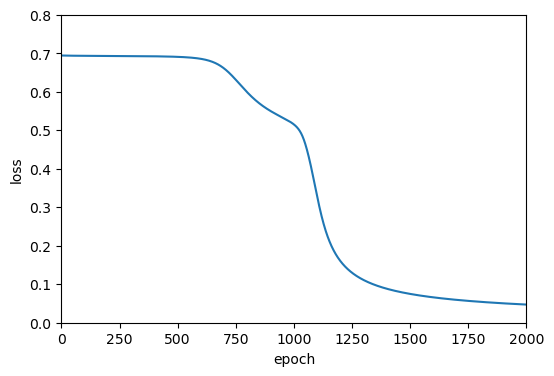

In [19]:
# Plot the loss over epochs
plt.figure(figsize=(6, 4))

plt.plot(losses)
plt.xlabel('epoch')
plt.ylabel('loss')

plt.xlim([0, 2000])
plt.ylim([0, .8])

plt.show()

In [15]:
# Predictions after training
def predict(x):
    hidden_layer_input = n.dot(x, weights_hidden) + bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = n.dot(hidden_layer_output, weights_output) + bias_output
    output_layer_output = sigmoid(output_layer_input)
    return output_layer_output

In [20]:
# Predictions outputs
y_hat = predict(X)
print("Predicted Outputs:\n", y_hat)
print("Actual Outputs:\n", Y)

Predicted Outputs:
 [[0.05079207]
 [0.95417259]
 [0.95794007]
 [0.04554936]]
Actual Outputs:
 [[0]
 [1]
 [1]
 [0]]
